In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
shoping=pd.read_excel('final_ebay_data.xlsx')

In [126]:
shoping.head(10)

,product_name,price,shipment_charges,Location,unit_sold,Product
0,CHUWI 14.1'' Laptop Computer PC Windows 11,14399,0,United States,232,Laptop
1,LENOVO THINKPAD T480 14,16499,5920,United States,86,Laptop
2,Acer Chromebook C740 11.6,18320,5280,United States,40,Laptop
3,Dell Chromebook 3189 Touchscreen Tablet,19034,3920,United States,266,Laptop
4,Alienware 15 r2,13640,0,United States,144,Laptop
5,HP chrome laptop,20400,1200,United States,249,Laptop
6,ASUS ZenBook Pro Duo,212000,6320,United States,284,Laptop
7,HP PROBOOK 650 G5 i5,17600,0,United States,277,Laptop
8,Lenovo Legion 5 Pro 16 165Hz QHD IPS G,103999,0,United States,68,Laptop
9,Samsung âœ…Chromebook Laptop 11.6,30399,0,United States,300,Laptop


In [127]:
shoping.tail(10)

,product_name,price,shipment_charges,Location,unit_sold,Product
1011,Apple Ipad Mini 6,35920,0,United States,221,Tablet
1012,Apple iPad 6,11920,0,United States,311,Tablet
1013,Apple iPad Pro,27120,0,United States,165,Tablet
1014,Microsoft Surface Pro 4 Wi,15999,0,United States,59,Tablet
1015,Lenovo 240,21848,7018,Germany,169,Tablet
1016,Tablet 8Inch Android 11 Phone Tablets With 512GB,6958,79,China,119,Tablet
1017,Tablet 8Inch Android 11 Phone Tablets,7802,79,China,303,Tablet
1018,Tablet 8Inch Android 11 Phone Tablets,7822,79,China,144,Tablet
1019,New Samsung Galaxy Book Go 5G 14â€ 128GB,6080,0,United States,93,Tablet
1020,Tablet 7.1Inch Android10 3G Phone Tablets,8096,79,China,295,Tablet


In [128]:
shoping.shape

(1021, 6)

In [129]:
shoping.columns

Index(['product_name', 'price', 'shipment_charges', 'Location', 'unit_sold',
       'Product'],
      dtype='object')

In [130]:
shoping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_name      1021 non-null   object
 1   price             1021 non-null   int64 
 2   shipment_charges  1021 non-null   int64 
 3   Location          1021 non-null   object
 4   unit_sold         1021 non-null   int64 
 5   Product           1021 non-null   object
dtypes: int64(3), object(3)
memory usage: 48.0+ KB


In [131]:
shoping.nunique()

product_name        895
price               692
shipment_charges    215
Location             32
unit_sold           568
Product               3
dtype: int64

In [132]:
shoping.isnull().sum()

product_name        0
price               0
shipment_charges    0
Location            0
unit_sold           0
Product             0
dtype: int64

In [133]:
shoping.duplicated().sum()

0

In [134]:
corelation=shoping.corr()
corelation

,price,shipment_charges,unit_sold
price,1.000000,0.100910,0.037011
shipment_charges,0.100910,1.000000,-0.188345
unit_sold,0.037011,-0.188345,1.000000


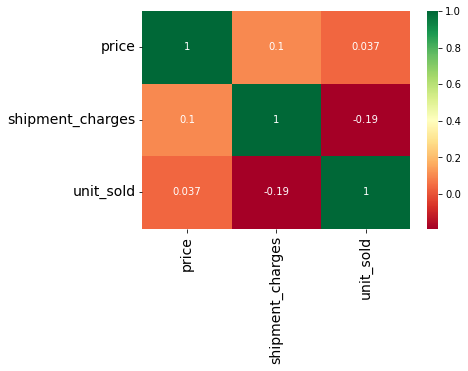

In [135]:
sns.heatmap(corelation,annot=True,cmap='RdYlGn')
plt.yticks(rotation=0,fontsize=14)
plt.xticks(rotation=90,fontsize=14)
plt.show()

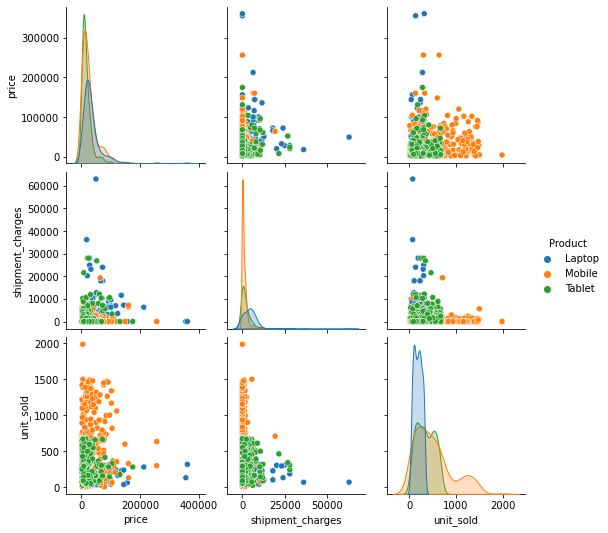

In [136]:
sns.pairplot(shoping,hue='Product')
plt.show()


plot pairwise relationships between variables within a dataset.

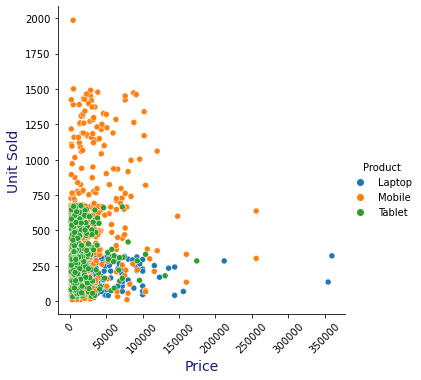

In [138]:
sns.relplot(x='price',y='unit_sold',hue='Product',data=shoping)
plt.xticks(rotation=45)
plt.xlabel('Price',fontsize=14,color='midnightblue')
plt.ylabel('Unit Sold',fontsize=14,color='midnightblue')
plt.show()

Product price and unit sold relationship.

# Category and there total porducts.

In [85]:
unit=shoping['Product'].value_counts().reset_index()
total_units=unit.rename(columns={'index':'Product','Product':'total product'})
total_units


,Product,total product
0,Mobile,429
1,Tablet,301
2,Laptop,291


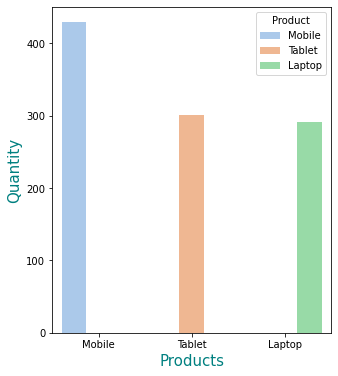

In [86]:
plt.figure(figsize=(5,6))
sns.barplot(x = 'Product',y='total product',hue = 'Product', data = total_units, palette='pastel')
plt.xlabel('Products',fontsize=15,color='teal')
plt.ylabel('Quantity',fontsize=15,color='teal')

plt.show()

Mobile has the Maximum numbers of Listing Products.

# top 5 cheapest product in all category

In [87]:
shoping[shoping['Product']=='Laptop'].sort_values('price').head()

,product_name,price,shipment_charges,Location,unit_sold,Product
66,HP G60,7999,8088,United States,196,Laptop
139,HP Compaq CQ,8000,4800,Greece,270,Laptop
175,Acer Aspire 5610z,8000,5200,Greece,115,Laptop
62,Sony Vaio VGN,8800,6400,Greece,155,Laptop
261,8inch 1280Ã—800 Display Screen Computer,8851,79,China,70,Laptop


In [88]:
shoping[shoping['Product']=='Mobile'].sort_values('price').head()

,product_name,price,shipment_charges,Location,unit_sold,Product
454,Unlocked For BM30 Mini Cellphone,1143,239,China,239,Mobile
512,GoClever Quantum 500 SMARTPHONE,1200,760,Ukraine,676,Mobile
538,Doro Primo 215,1200,1200,Lithuania,560,Mobile
423,New Tracfone Alcatel One Touch A206G,1440,1680,United States,727,Mobile
401,Nokia 6070,1546,80,China,436,Mobile


In [89]:
shoping[shoping['Product']=='Tablet'].sort_values('price').head()

,product_name,price,shipment_charges,Location,unit_sold,Product
785,Zeki 7,1600,2120,United States,81,Tablet
727,Amazon Fire HD 8,1600,2014,United States,315,Tablet
903,NuVision TM800W560L 32GB,1746,0,Canada,210,Tablet
1008,Apple iPad Air 1st gen,1839,0,United States,254,Tablet
729,Apple iPad Mini 1st Gen,1880,0,United States,591,Tablet


# Top 5 costly product from all the category

In [90]:
shoping[shoping['Product']=='Laptop'].sort_values('price',ascending=False).head()

,product_name,price,shipment_charges,Location,unit_sold,Product
234,Dell XPS 9500 15.6 inches UHD,360064,0,India,320,Laptop
178,ASUS 2021 ROG Strix G17 17.3,354880,0,India,135,Laptop
6,ASUS ZenBook Pro Duo,212000,6320,United States,284,Laptop
21,Microsoft Surface Book 3 15,155920,0,United States,68,Laptop
207,ASUS ROG Gaming Laptop,143920,7248,United States,41,Laptop


In [91]:
shoping[shoping['Product']=='Mobile'].sort_values('price',ascending=False).head()

,product_name,price,shipment_charges,Location,unit_sold,Product
394,Apple iPhone 13 Pro Max 512gb Navy Aurora Edition,256000,0,Poland,302,Mobile
460,Apple iPhone 13 Pro 512gb Flow Edition,256000,0,United Arab Emirates,637,Mobile
459,Apple iPhone 14 Pro Max,160000,7200,Greece,331,Mobile
456,Apple iPhone 13 Pro Max,160000,6400,Greece,134,Mobile
425,ASUS ROG Phone 6D Ultimate 512GB,148000,0,United States,600,Mobile


In [92]:
shoping[shoping['Product']=='Tablet'].sort_values('price',ascending=False).head()

,product_name,price,shipment_charges,Location,unit_sold,Product
875,VAIO Pro PA laptop tablet,174320,0,Japan,284,Tablet
911,Microsoft Surface Pro 7 Intel Core i5 12.3,130800,0,United Kingdom,179,Tablet
832,HP ELITE X2 1012 G1 TABLET,103920,3360,United States,331,Tablet
989,Samsung Galaxy Tab S7,95676,10556,United States,147,Tablet
963,Samsung Galaxy Tab S8 Ultra 5G,92533,10287,Australia,285,Tablet


#  All product with 0 shipment charges

In [93]:
mask=shoping['shipment_charges']==0
zero_delivery=shoping[mask]
zero_delivery

,product_name,price,shipment_charges,Location,unit_sold,Product
0,CHUWI 14.1'' Laptop Computer PC Windows 11,14399,0,United States,232,Laptop
4,Alienware 15 r2,13640,0,United States,144,Laptop
7,HP PROBOOK 650 G5 i5,17600,0,United States,277,Laptop
8,Lenovo Legion 5 Pro 16 165Hz QHD IPS G,103999,0,United States,68,Laptop
9,Samsung âœ…Chromebook Laptop 11.6,30399,0,United States,300,Laptop
...,...,...,...,...,...,...
1011,Apple Ipad Mini 6,35920,0,United States,221,Tablet
1012,Apple iPad 6,11920,0,United States,311,Tablet
1013,Apple iPad Pro,27120,0,United States,165,Tablet
1014,Microsoft Surface Pro 4 Wi,15999,0,United States,59,Tablet


So there are total 427 Products which do not take any shipment charges.

# Top 5 Product which have maximum shipment charges

In [94]:
max=shoping[['product_name','shipment_charges']].sort_values('shipment_charges',ascending=False).head(5)
max

,product_name,shipment_charges
81,Lot of 4x Dell Latitude XFR E6400 14,62992
77,Lenovo ThinkPad L450 14,36175
760,Samsung Galaxy Tab A7 Lite MT8768 32GB 8.7,28000
767,Tab M10 MT Helio P22T 64GB 10.3,28000
182,Galaxy Tab A8 64GB 10.5,28000


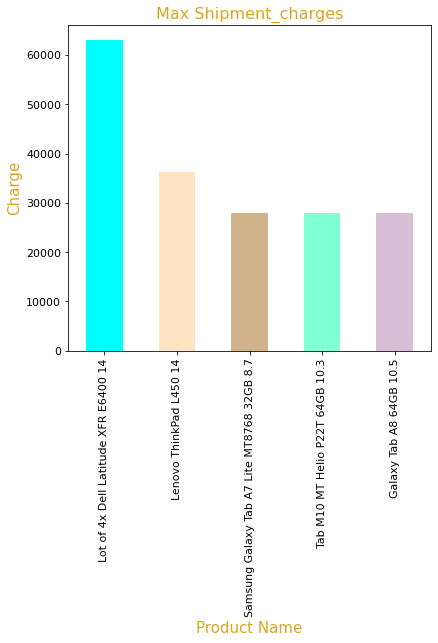

In [26]:
color=['cyan','bisque','tan','aquamarine','thistle']

max.plot.bar(x='product_name',y='shipment_charges',fontsize=11,color=color,figsize=(6.5,6))

plt.xlabel('Product Name',fontsize=15,color='goldenrod')
plt.ylabel('Charge',fontsize=15,color='goldenrod')
plt.title('Max Shipment_charges',fontsize=16,color='goldenrod')
plt.legend().remove()

plt.show()

Laptop (Lot of 4x Dell Latitude XFR E6400 14) is charging the Maximum Shipment Charge that is Rs.62992.

#  Product cost including shipment charges

In [141]:
shoping['total_price']=shoping['price'] + shoping['shipment_charges']
shoping

,product_name,price,shipment_charges,Location,unit_sold,Product,total_price
0,CHUWI 14.1'' Laptop Computer PC Windows 11,14399,0,United States,232,Laptop,14399
1,LENOVO THINKPAD T480 14,16499,5920,United States,86,Laptop,22419
2,Acer Chromebook C740 11.6,18320,5280,United States,40,Laptop,23600
3,Dell Chromebook 3189 Touchscreen Tablet,19034,3920,United States,266,Laptop,22954
4,Alienware 15 r2,13640,0,United States,144,Laptop,13640
...,...,...,...,...,...,...,...
1016,Tablet 8Inch Android 11 Phone Tablets With 512GB,6958,79,China,119,Tablet,7037
1017,Tablet 8Inch Android 11 Phone Tablets,7802,79,China,303,Tablet,7881
1018,Tablet 8Inch Android 11 Phone Tablets,7822,79,China,144,Tablet,7901
1019,New Samsung Galaxy Book Go 5G 14â€ 128GB,6080,0,United States,93,Tablet,6080


#  Top 5 Location with there  total listing products

In [96]:
locate=shoping['Location'].value_counts(ascending=False).head().reset_index().rename(columns={'index':'Location','Location':'Total Product'})
locate

,Location,Total Product
0,United States,483
1,United Kingdom,113
2,China,105
3,Japan,83
4,Australia,76


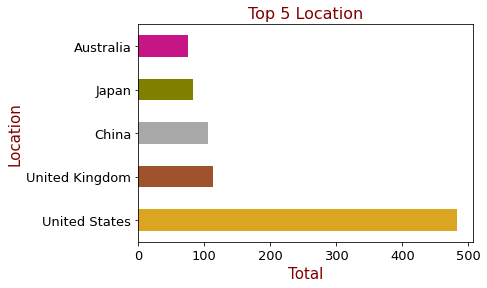

In [97]:
color=['goldenrod','sienna','darkgrey','olive','mediumvioletred']
locate.plot.barh(x='Location',y='Total Product',fontsize=13,color=color)
plt.xlabel('Total',fontsize=15,color='maroon')
plt.ylabel('Location',fontsize=15,color='maroon')
plt.title('Top 5 Location',fontsize=16,color='maroon')
plt.legend().remove()

plt.show()

United States has the Maximum Number of Listing Products 483.

#  Find the total listing of products by category from each country

In [98]:
df=shoping.groupby(['Location','Product']).count().sort_values('Location',ascending=False)
df['product_name'].reset_index().rename(columns={'product_name':'Total_listing'})

,Location,Product,Total_listing
0,United States,Tablet,160
1,United States,Mobile,139
2,United States,Laptop,184
3,United Kingdom,Tablet,33
4,United Kingdom,Mobile,71
5,United Kingdom,Laptop,9
6,United Arab Emirates,Tablet,1
7,United Arab Emirates,Mobile,5
8,United Arab Emirates,Laptop,5
9,Ukraine,Mobile,8


In all the Category United States has the maximum listing products.

# Top 5 most selling products in each category

In [99]:
Mob=shoping[shoping['Product']=='Mobile'].sort_values('unit_sold',ascending=False).head()
Mobile=Mob[['product_name','unit_sold']]
Mobile

,product_name,unit_sold
304,Unlocked Lenovo ZUK Z2 Plus Phone,1985
336,Blackberry Key2 BBF100,1500
586,BNIB Vivo Y01 4G,1490
716,BNIB Xiaomi Mi 11 Lite Dual,1477
574,BNIB Vivo X70 Pro 5G Aurora,1472


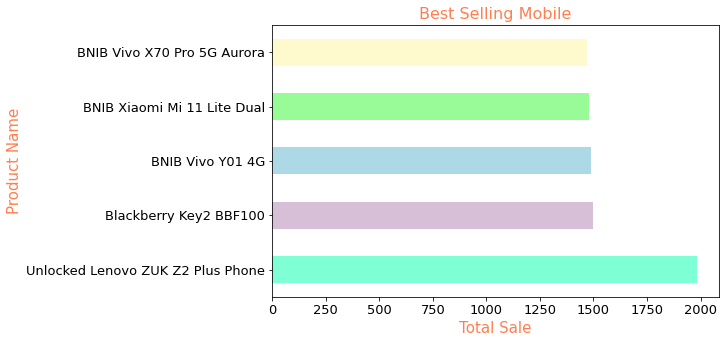

In [139]:
color=['aquamarine','thistle','lightblue','palegreen','lemonchiffon']
Mobile.plot.barh(x='product_name',y='unit_sold',fontsize=13,color=color,figsize=(8,5))
plt.xlabel('Total Sale',fontsize=15,color='coral')
plt.ylabel('Product Name',fontsize=15,color='coral')
plt.title('Best Selling Mobile',fontsize=16,color='coral')
plt.legend().remove()

plt.show()



Unlocked Lenovo ZUK Z2 Plus Phone is the most purchased mobile phone.

In [33]:
lap=shoping[shoping['Product']=='Laptop'].sort_values('unit_sold',ascending=False).head()
lap2=lap[['product_name','unit_sold']]
lap2

,product_name,unit_sold
101,Lenovo Thinkpad L512 Laptop 15.6,324
265,RICILAR Windows 10 Home Laptop 14.1 Inch,324
202,Impact Scratch Tablet PC Notebook Toughbook Cf,323
129,GPD WIN 2 Super,323
58,HP Pavilion zd8000 PC 17,322


In [35]:
Tab=shoping[shoping['Product']=='Tablet'].sort_values('unit_sold',ascending=False).head()
Tablet=Tab[['product_name','unit_sold']]
Tablet

,product_name,unit_sold
917,KAKTIN Android Tablet10 inch,679
919,Konka SP20,677
990,Apple iPad 4th Gen. 16GB,676
978,Tablet PC Fire 7 Kids Model,675
769,Samsung Galaxy Tab A8 10.5,672


# Top Expensive product list

In [37]:
high=shoping[['Product','product_name','total_price']].sort_values('total_price',ascending=False).head(10)
high

,Product,product_name,total_price
234,Laptop,Dell XPS 9500 15.6 inches UHD,360064
178,Laptop,ASUS 2021 ROG Strix G17 17.3,354880
460,Mobile,Apple iPhone 13 Pro 512gb Flow Edition,256000
394,Mobile,Apple iPhone 13 Pro Max 512gb Navy Aurora Edition,256000
6,Laptop,ASUS ZenBook Pro Duo,218320
875,Tablet,VAIO Pro PA laptop tablet,174320
459,Mobile,Apple iPhone 14 Pro Max,167200
456,Mobile,Apple iPhone 13 Pro Max,166400
21,Laptop,Microsoft Surface Book 3 15,155920
207,Laptop,ASUS ROG Gaming Laptop,151168


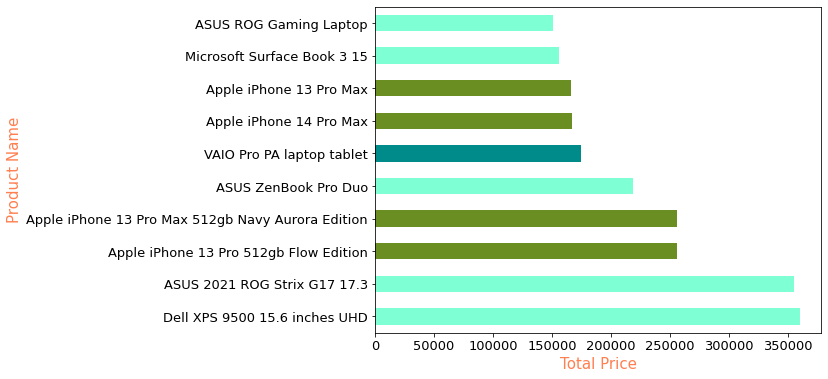

In [38]:
color=['aquamarine','aquamarine','olivedrab','olivedrab','aquamarine','darkcyan','olivedrab','olivedrab','aquamarine','aquamarine']
high.plot.barh(x='product_name',y='total_price',fontsize=13,color=color,figsize=(8,6))
plt.xlabel('Total Price',fontsize=15,color='coral')
plt.ylabel('Product Name',fontsize=15,color='coral')

plt.legend().remove()

plt.show()

In Laptop (Dell XPS 9500 15.6 inches UHD) is the most expensive product.

In Mobile (Apple iPhone 13 Pro 512gb Flow Edition) is the most expensive product.

In Tablet (VAIO Pro PA laptop tablet) is the most expensive product.

#  Top 10 Cheapest Product list by there total price

In [142]:
low=shoping[['Product','product_name','total_price']].sort_values('total_price',ascending=True).head(10)
low

,Product,product_name,total_price
454,Mobile,Unlocked For BM30 Mini Cellphone,1382
401,Mobile,Nokia 6070,1626
903,Tablet,NuVision TM800W560L 32GB,1746
1008,Tablet,Apple iPad Air 1st gen,1839
594,Mobile,BLU VIVO 5 MINI,1868
597,Mobile,BLU VIVO 5 MINI,1868
729,Tablet,Apple iPad Mini 1st Gen,1880
563,Mobile,For vivo X Fold Case,1919
588,Mobile,BLU VIVO 5 MINI,1919
512,Mobile,GoClever Quantum 500 SMARTPHONE,1960


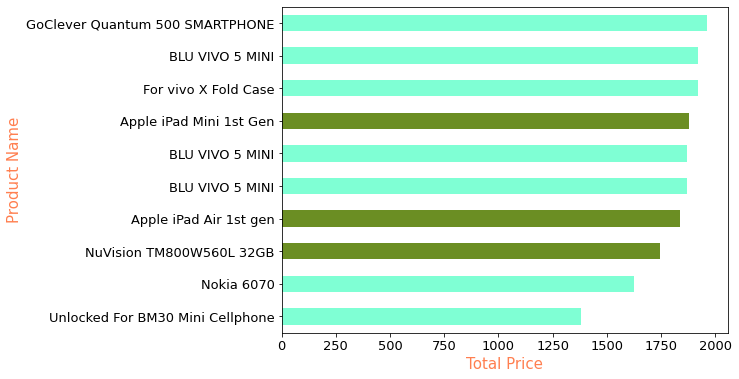

In [144]:
color=['aquamarine','aquamarine','olivedrab','olivedrab','aquamarine','aquamarine','olivedrab','aquamarine','aquamarine','aquamarine']
low.plot.barh(x='product_name',y='total_price',fontsize=13,color=color,figsize=(8,6))
plt.xlabel('Total Price',fontsize=15,color='coral')
plt.ylabel('Product Name',fontsize=15,color='coral')

plt.legend().remove()

plt.show()

# Calculating product wise total slae.

In [101]:
shoping['Total_sale']=shoping['unit_sold']*shoping['total_price']
shoping

,product_name,price,shipment_charges,Location,unit_sold,Product,total_price,Total_sale
0,CHUWI 14.1'' Laptop Computer PC Windows 11,14399,0,United States,232,Laptop,14399,3340568
1,LENOVO THINKPAD T480 14,16499,5920,United States,86,Laptop,22419,1928034
2,Acer Chromebook C740 11.6,18320,5280,United States,40,Laptop,23600,944000
3,Dell Chromebook 3189 Touchscreen Tablet,19034,3920,United States,266,Laptop,22954,6105764
4,Alienware 15 r2,13640,0,United States,144,Laptop,13640,1964160
...,...,...,...,...,...,...,...,...
1016,Tablet 8Inch Android 11 Phone Tablets With 512GB,6958,79,China,119,Tablet,7037,837403
1017,Tablet 8Inch Android 11 Phone Tablets,7802,79,China,303,Tablet,7881,2387943
1018,Tablet 8Inch Android 11 Phone Tablets,7822,79,China,144,Tablet,7901,1137744
1019,New Samsung Galaxy Book Go 5G 14â€ 128GB,6080,0,United States,93,Tablet,6080,565440


# Category wise most revenue generating products

In [102]:
shoping.groupby('Product')[['Product','product_name','Total_sale']].head()

,Product,product_name,Total_sale
0,Laptop,CHUWI 14.1'' Laptop Computer PC Windows 11,3340568
1,Laptop,LENOVO THINKPAD T480 14,1928034
2,Laptop,Acer Chromebook C740 11.6,944000
3,Laptop,Dell Chromebook 3189 Touchscreen Tablet,6105764
4,Laptop,Alienware 15 r2,1964160
291,Mobile,S22 Ultra 5G 6.7,1852615
292,Mobile,Smartphone Flip cell M series,877765
293,Mobile,Nokia 3310 blue Unlocked 2G GSM 900,4779600
294,Mobile,Apple iPhone 8 64GB Unlocked Smartphone,8042616
295,Mobile,Motorola RAZR V3 Flip Mobile,50500


List of 5 product in all category who generating maximum Revenue.

#  Total sales in all category

In [112]:
total=shoping.groupby('Product')[['unit_sold','Total_sale']].sum().reset_index().rename(columns={'total_price':'Total Sale'})
total

,Product,unit_sold,Total_sale
0,Laptop,52564,2144330156
1,Mobile,219544,6790002849
2,Tablet,103664,1914530623


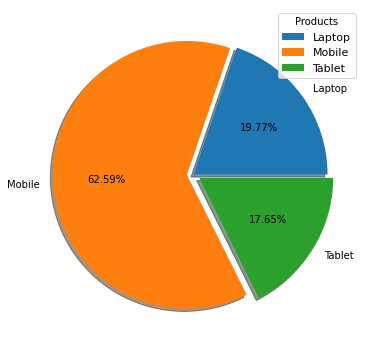

In [123]:
labels=['Laptop','Mobile','Tablet']
plt.figure(figsize=(6,7))
plt.pie(total['Total_sale'], labels=labels,autopct='%.2f%%',explode=[0,0.05,0.05],shadow=True)
plt.legend(title='Products',fontsize=11)
plt.show()

As compare to Tablet and Laptop Mobile phone Generating the Maximum Revenue that is approx 63% of whole Revenue.